In [3]:

import numpy as np
import torch
from cebmf_torch import *
from cebmf_torch.utils.torch_utils_mix import autoselect_scales_mix_norm
import matplotlib.pyplot as plt
from cebmf_torch.utils.torch_distribution_operation import get_data_loglik_normal_torch 
 
betahat=  np.array([1,2,3,4,5], dtype=float)
sebetahat=np.array([1,0.4,5,1,1], dtype=float)
scale = autoselect_scales_mix_norm ( torch.tensor(betahat),  torch.tensor(sebetahat)).cpu().numpy()
location = np.zeros_like(scale)
n=betahat.shape[0]
p= scale.shape[0]

    # Single x=betahat[1]
L_single = get_data_loglik_normal_torch(torch.tensor([betahat[1]], dtype=torch.float64),
                                      torch.tensor([sebetahat[1]], dtype=torch.float64),
                                      torch.tensor(location, dtype=torch.float64),
                                      torch.tensor(scale, dtype=torch.float64)).cpu().numpy()[0]

expected_scale= np.array([0.        , 0.03827328, 0.07654655, 0.15309311, 0.30618622,
       0.61237244, 1.22474487, 2.44948974, 4.89897949, 9.79795897])
expected_convolved= np.array([-12.5026478 , -12.39380192, -12.07903895, -10.97389398,
        -8.11500906,  -4.34451202,  -2.37716661,  -2.15265225,
        -2.59406918,  -3.22274394])

    # Full loglik matrix
data_loglik = get_data_loglik_normal_torch ( torch.tensor(betahat, dtype=torch.float64),
                                           torch.tensor(sebetahat, dtype=torch.float64),
                                           torch.zeros_like(torch.tensor(scale, dtype=torch.float64)),
                                           torch.tensor(scale, dtype=torch.float64)).cpu().numpy()

    # Apply log-sum-exp with uniform pi
log_pi = np.log(np.full((n,p), 1/p))
res = np.log(np.exp(data_loglik) * (1/p))

    # Reproduce "expected_result" matrix using original constants for sanity
expected_res= np.array([[ -2.0667347 ,  -2.06673523,  -2.06674321,  -2.06686784,
         -2.06868363,  -2.08959792,  -2.22488006,  -2.61111834,
         -3.19617261,  -3.85924482],
       [-11.41455194, -11.30570607, -10.99094309,  -9.88579812,
         -7.0269132 ,  -3.25641616,  -1.28907075,  -1.06455639,
         -1.50597332,  -2.13464808],
       [ -2.22020012,  -2.22021887,  -2.22027512,  -2.22050006,
         -2.22139914,  -2.22498433,  -2.2391459 ,  -2.2929171 ,
         -2.46850909,  -2.86584757],
       [ -7.05746176,  -7.04649204,  -7.01378096,  -6.88583918,
         -6.41655355,  -5.03487044,  -2.71560713,  -1.17327398,
         -0.98689967,  -1.42729148],
       [-11.22103348, -11.2034816 , -11.15113909, -10.94635747,
        -10.19441099,  -7.97116944,  -4.17917885,  -1.47970284,
         -0.83047139,  -1.13725495]])

expected_loglik_mat= np.array([[ -1.41893853,  -1.41893907,  -1.41894705,  -1.41907168,
         -1.42088747,  -1.44180176,  -1.5770839 ,  -1.96332218,
         -2.54837645,  -3.21144866],
       [-12.5026478 , -12.39380192, -12.07903895, -10.97389398,
         -8.11500906,  -4.34451202,  -2.37716661,  -2.15265225,
         -2.59406918,  -3.22274394],
       [ -2.70837645,  -2.7083952 ,  -2.70845144,  -2.70867638,
         -2.70957546,  -2.71316065,  -2.72732222,  -2.78109343,
         -2.95668542,  -3.35402389],
       [ -8.91893853,  -8.90796881,  -8.87525773,  -8.74731596,
         -8.27803033,  -6.89634722,  -4.5770839 ,  -3.03475075,
         -2.84837645,  -3.28876825],
       [-13.41893853, -13.40138666, -13.34904414, -13.14426252,
        -12.39231604, -10.16907449,  -6.3770839 ,  -3.67760789,
         -3.02837645,  -3.33516   ]])
 


In [ ]:
res


array([[ -3.72152363,  -3.72152416,  -3.72153214,  -3.72165677,
         -3.72347256,  -3.74438686,  -3.87966901,  -4.2659073 ,
         -4.85096157,  -5.51403379],
       [-14.80523289, -14.69638701, -14.38162402, -13.27647898,
        -10.41759395,  -6.64709695,  -4.67975166,  -4.45523735,
         -4.8966543 ,  -5.52532907],
       [ -5.01096154,  -5.01098029,  -5.01103653,  -5.01126148,
         -5.01216055,  -5.01574575,  -5.02990731,  -5.08367852,
         -5.25927052,  -5.65660901],
       [-11.22152363, -11.2105539 , -11.17784282, -11.04990104,
        -10.58061538,  -9.1989322 ,  -6.87966887,  -5.3373358 ,
         -5.15096155,  -5.59135337],
       [-15.72152363, -15.70397175, -15.65162922, -15.44684759,
        -14.69490107, -12.47165941,  -8.6796688 ,  -5.98019291,
         -5.33096154,  -5.63774512]])

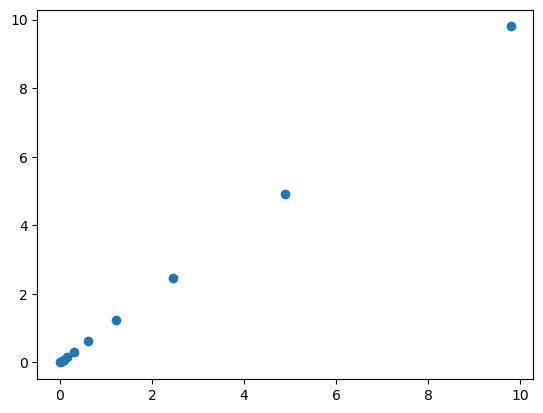

In [ ]:
plt.scatter(scale, expected_scale)

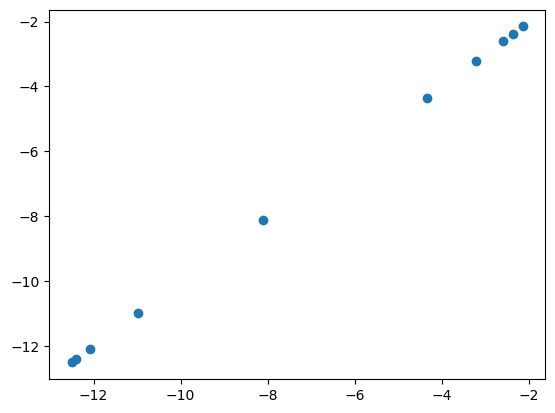

In [ ]:
plt.scatter(L_single, expected_convolved)

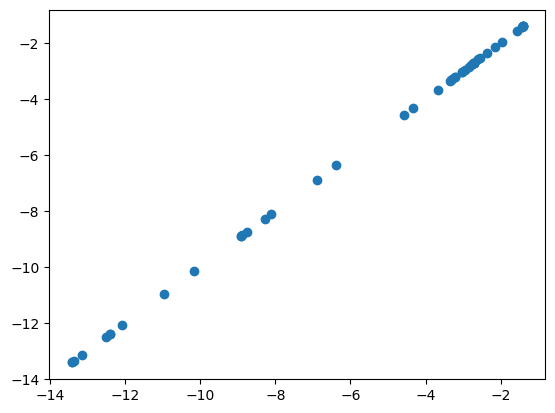

In [ ]:
plt.scatter(data_loglik , expected_loglik_mat )